### Creating a venv to store dependencies

In [3]:
%%python -m venv myenv
%%.\myenv\Scripts\activate

### Installing required dependencies

In [4]:
%pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached numpy-2.3.0-cp311-cp311-win_amd64.whl (13.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install numpy matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp31


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install scikit-image

  Using cached scikit_image-0.25.2-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached tifffile-2025.6.11-py3-none-any.whl.metadata (32 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached scikit_image-0.25.2-cp311-cp311-win_amd64.whl (12.8 MB)
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached tifffile-2025.6.11-py3-none-any.whl (230 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing libraries

In [7]:
import numpy as np
import cv2
from skimage import io
import matplotlib as plt
import random

print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.11.0


## Problem-1

1-Read and display the original image in colour

In this step, ı use cv2.imread functıon for uploading engineer.jpg. Than ı use image.shape to take height and widht of image.

In [ ]:

image = cv2.imread('./images/tf2_engineer.jpg')


height, width, _ = image.shape
center_y = height // 2
center_x = width // 2
print(f"Image center coordinates: (x={center_x}, y={center_y})")

I changed image color to gray. After that ı find center of image and display.

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
center_intensity = gray_image[center_y, center_x]
print(f"Intensity value at center: {center_intensity}")

ı place rectangular color patch in the center of image.Rectangle' heihgt is 30 and widht is 40.I use hex_color.

In [ ]:
rect_height = 30
rect_width = 40


hex_color = '#329ea8'
color_bgr = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))[::-1]


rect_x1 = center_x - rect_width // 2
rect_y1 = center_y - rect_height // 2
rect_x2 = rect_x1 + rect_width
rect_y2 = rect_y1 + rect_height


image_with_patch = image.copy()
cv2.rectangle(image_with_patch, (rect_x1, rect_y1), (rect_x2, rect_y2), color_bgr, -1)


I get center intensity value from gray image.Than ı use Opencv for the converting BGR to RGB.Bu dönüşüm matplotlib için gerekli.

In [ ]:
patch_center_intensity = gray_image[center_y, center_x]
print(f"Intensity value at center of color patch: {patch_center_intensity}")


original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
patched_rgb = cv2.cvtColor(image_with_patch, cv2.COLOR_BGR2RGB)

In this cell, ı use matploit library for visualization

In [ ]:

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(patched_rgb)
plt.title('Image with Color Patch')
plt.axis('off')

plt.tight_layout()
plt.show()

Image center coordinates: (x=92, y=92)
Intensity value at center: 113
Intensity value at center of color patch: 113


TypeError: 'module' object is not callable

## Problem-2

1-Read and display the original image in grayscale
In this step ı upload gray scale image with using cv2.imread and cv2.IMREAD_GRAYSCALE.It is opening window and showing image.

In [1]:
einstein_image=cv2.imread("./images/einstein.tif",cv2.IMREAD_GRAYSCALE)
cv2.imshow("Grayscale image", einstein_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

2-Find and display the negative image
ın here, ı substract image from 255. Than ı have negative version of image.After that ı display result with cv2.imshow.


In [24]:
negative_image= 255-einstein_image
cv2.imshow("Negative image",negative_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

I take image's height and widht with using einstein_image.shape.First ı create empty list for random pixels.I use for loop for the randomly take pixels.Than ı append pixels with .append() method.

In [25]:
height, width = einstein_image.shape

r_pixels=[]
for i in range(5):
    y = random.randint(0, height - 1)
    x = random.randint(0, width - 1)
    r_pixels.append((y, x))

Pixel values before and after
In this cell, for loop takes y and x values from pixel list and put inside of original image and negative image.In the end ı compare results.

In [26]:
for y,x in r_pixels:
    original_value= einstein_image[y,x]
    negative_value= negative_image[y,x]
    print(f"({y}, {x})        {original_value}           {negative_value}")

(439, 783)        98           157
(394, 434)        123           132
(367, 457)        119           136
(170, 728)        100           155
(414, 782)        98           157


I show grayscale and negative image using matploit library.

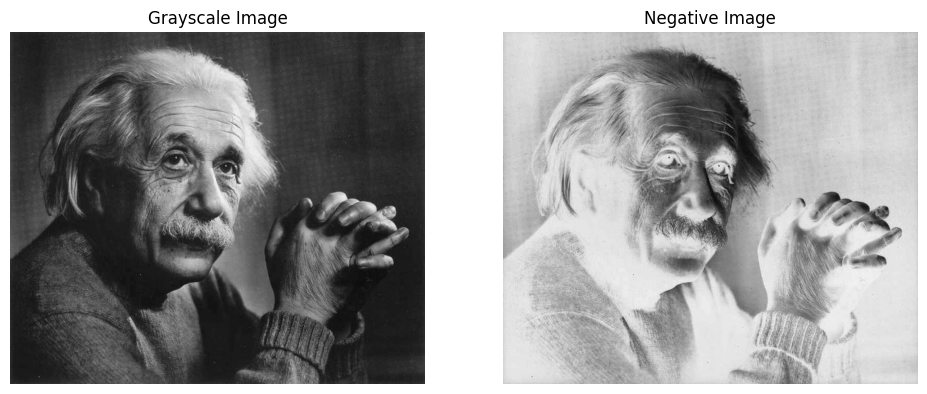

In [ ]:
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.imshow(einstein_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title("Negative Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## Problem-3

1-Read and display the original image in grayscale.
I upload my image as graysacale.


In [7]:
image = cv2.imread('./images/pout.tif', cv2.IMREAD_GRAYSCALE)

2-Apply log transform to original image and display the result.
Firstly ı calculate scaling constant for the formula.Than ı convert float32 to deny precision loss.Aftre that ı transform image back with using uint8.

In [8]:
c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image.astype(np.float32))
log_image_uint8 = np.array(log_image, dtype=np.uint8)

3-Apply inverse log transform to original image and display the result
Exponentialfunction reverse the log trnsformation.It is very effective functıon when ı use for inverse log transform.Unlike the log transformation, here we don't add by 1, we subtract 1 to get rid of the one we added before.

In [9]:
inverse_log_from_original = np.exp(image.astype(np.float32) / c) - 1
inverse_log_from_original = np.clip(inverse_log_from_original, 0, 255).astype(np.uint8)

4-Apply inverse log transform to image you get from step 2 and display the result.
ın this cell,ı should create  inverse of the logarithmic transformation to the log_image.
Unlike the log transformation, here we don't add by 1, we subtract 1 to get rid of the one we added before.

In [10]:
inverse_log_from_log = np.exp(log_image / c) - 1
inverse_log_from_log = np.clip(inverse_log_from_log, 0, 255).astype(np.uint8)


inverse of the logarithmic transformation to the log_image.Unlike the log transformation, here we don't add by 1, we subtract 1 to get rid of the one we added before.

I used matplotlib for display results.This code show original grayscale image, Log tansformed image, ınverse log transformed image and ınverse log of log ımage.

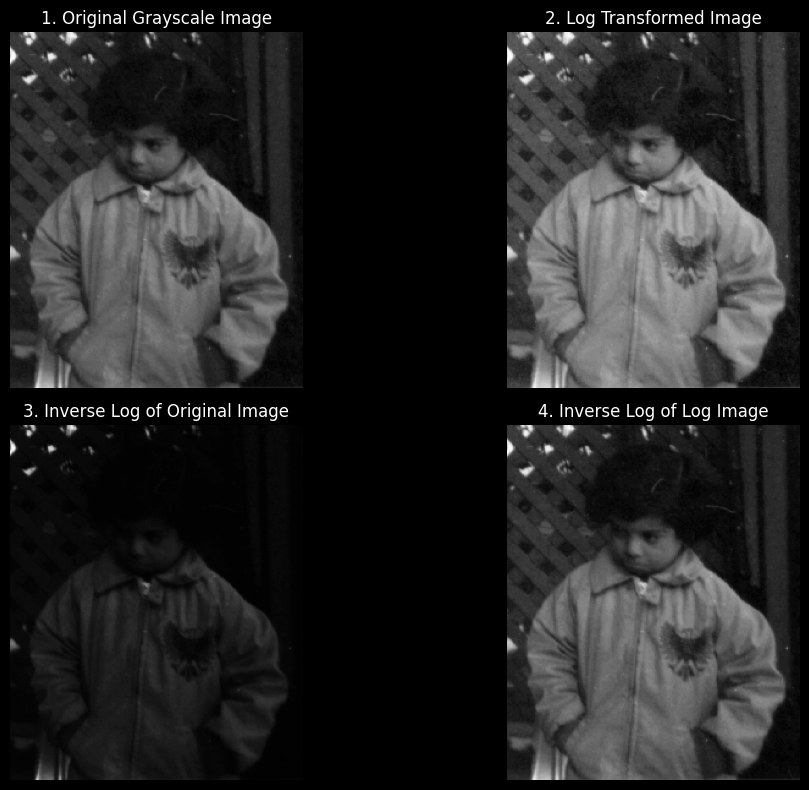

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("1. Original Grayscale Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(log_image_uint8, cmap='gray')
plt.title("2. Log Transformed Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(inverse_log_from_original, cmap='gray')
plt.title("3. Inverse Log of Original Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(inverse_log_from_log, cmap='gray')
plt.title("4. Inverse Log of Log Image")
plt.axis('off')

plt.tight_layout()
plt.show()

Comment on the images you get from step 2 and step 4.

The log transformation shows the invisible regions in the shadows. It shows the range of low intensity regions by log transforming them. In step 4, the log transformed image is restored to its original state by applying inverse-log. The images in step 4 and step 2 are more white intensive than the original image. In steps 4 and 2 the similarity is high.

## Problem-4

1-Read and display the original image in grayscale.
I upload image as a grayscale.

In [12]:
moon_image=cv2.imread("./images/moon.tif",cv2.IMREAD_GRAYSCALE)
cv2.imshow("Grayscale image", moon_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

2-Unsharp masking in spatial domain
I use unsharp masking technic with spatıal domain.I upload this technic with using unsharp_masking_spatial functıon.In k value represent sharpening strenght.Than ı apply Gausian blur for smoothing image.Cv2.addWeighted() functıon blends the original image and blurred image to create a sharpened image.After that ı create list for k valuses. I add sharpening functıon to moon_image with using k values and store them in a list.

In [ ]:
def unsharp_masking_spatial(image, k):
   
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    sharpened = cv2.addWeighted(image, 1 + k, blurred, -k, 0)
    return sharpened
k_values = [0.2, 0.8, 1.0]
spatial_results = [unsharp_masking_spatial(moon_image, k) for k in k_values]

Unsharp masking in frequency domain
Firstly, ı use fourier transform.It converts to image using 2D FFT.Then ı sue high-pass filter.In high-pass filter part D is important.It keeps lower values only sharp features.To enhance the image, the shifted frequency domain representation is multiplied by the modified filter, and then an inverse shift followed by an inverse FFT is applied to return to the spatial domain.I make D=40 .After all, ı apply frequency domain for moon_image with using k values.

In [ ]:
def unsharp_masking_frequency(image, k, D0):
    
    F = np.fft.fft2(image)
    Fshift = np.fft.fftshift(F)
    
   
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, rows)
    y = np.arange(0, cols)
    X, Y = np.meshgrid(y, x)
    D = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    H = 1 - np.exp(-(D**2) / (2 * (D0**2)))  
    
    
    G = (1 + k * H) * Fshift
    gshift = np.fft.ifftshift(G)
    g = np.fft.ifft2(gshift)
    sharpened_freq = np.abs(g)
    sharpened_freq = cv2.normalize(sharpened_freq, None, 0, 255, cv2.NORM_MINMAX)
    sharpened_freq = sharpened_freq.astype(np.uint8)
    return sharpened_freq
D0 = 40  
frequency_results = [unsharp_masking_frequency(moon_image, k, D0) for k in k_values]

Display the result
According to k values and filters, ı display moon image with using matploit library.

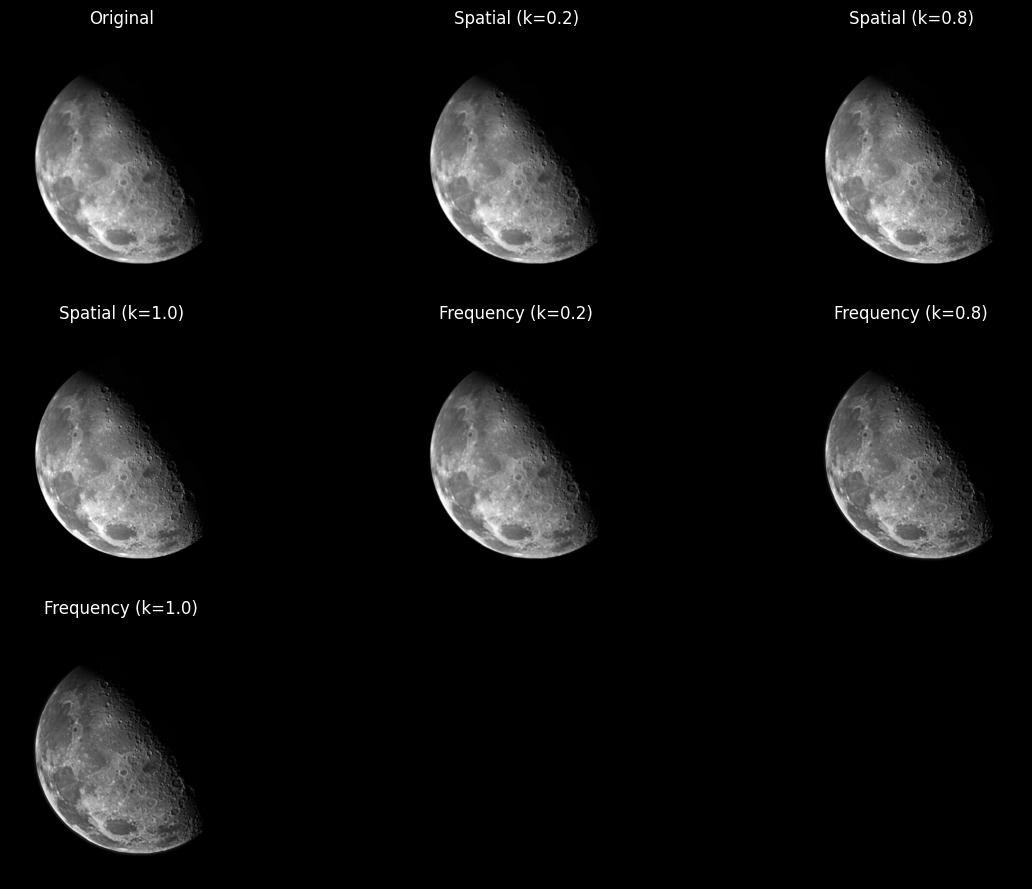

In [15]:
plt.figure(figsize=(12, 9))
plt.subplot(3, 3, 1)
plt.imshow(moon_image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(k_values):
    plt.subplot(3, 3, i + 2)
    plt.title(f'Spatial (k={k})')
    plt.imshow(spatial_results[i], cmap='gray')
    plt.axis('off')
    plt.subplot(3, 3, i + 5)
    plt.title(f'Frequency (k={k})')
    plt.imshow(frequency_results[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Problem-5

Read and display the original image in grayscale.
I display image as grayscale

In [16]:
pcb_image=cv2.imread("./images/pcb.tif",cv2.IMREAD_GRAYSCALE)
cv2.imshow("Grayscale image", pcb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Identify and describe the type of noise using visual inspection 
and/or statistical tools. 

In this cell, ı should understand the problem inside of the image.I use histogram to solve problem and ı use matploit library for displaying image.

Text(0, 0.5, 'Frequency')

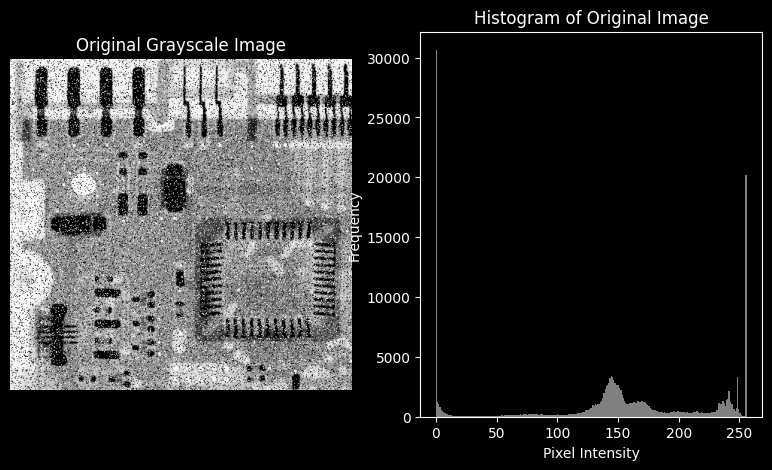

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(pcb_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.hist(pcb_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

Remove the noise using proper filtering sequence.
I anlayze the problem and find the problem.Salt and pepper is problem.For solving this problem ı use median filter.Applies a median filter to the image pcb_image with a kernel size of 3.This filter reduce the noise.

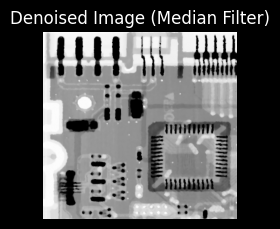

In [ ]:
denoised = cv2.medianBlur(pcb_image, 3)  

plt.subplot(1, 3, 3)
plt.imshow(denoised, cmap='gray')
plt.title('Denoised Image (Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Problem-6

Read and display the original image in grayscale.
I upload image as grayscale and display the image.

In [19]:
pollen_image=cv2.imread("./images/pollen.tif",cv2.IMREAD_GRAYSCALE)
cv2.imshow("Grayscale image", pollen_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Comment on the problem presented at that image. While commenting on the problem, provide 
proofs.To solving the problem ı display histogram.

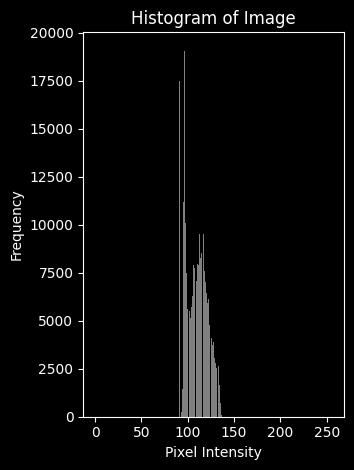

In [20]:
plt.subplot(1, 2, 2)
plt.hist(pollen_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
mean_intensity = np.mean(pollen_image)
std_dev_intensity = np.std(pollen_image)
print(f"Original Image Mean: {mean_intensity:.2f}, Std Dev: {std_dev_intensity:.2f}")

Original Image Mean: 109.08, Std Dev: 11.49


This image have very low contrast.It means this image looks pale,dull and opaque.I solve this problem with using Histogram equalızatıon and Unsharpmasking

Histogram Equalızatıon
I applied  histogram equalızatıon with using cv2.equalizeHist.This approach increases contrast of image.I find mean and standart deviation of image.

In [22]:
equalized_img = cv2.equalizeHist(pollen_image)
equalized_stats = (np.mean(equalized_img), np.std(equalized_img))

UnsharpMasking
I blurred the image with a Gaussian filter to make it smoother. Then, I combined the blurred image with the original one to make it sharper. After that, I calculated the average brightness and contrast of the sharpened image.

In [23]:
blurred = cv2.GaussianBlur(pollen_image, (9, 9), 10.0)
unsharp_img = cv2.addWeighted(pollen_image, 1.5, blurred, -0.5, 0)
unsharp_stats = (np.mean(unsharp_img), np.std(unsharp_img))

Comparing Images as Visual
I display the result for comparing images.

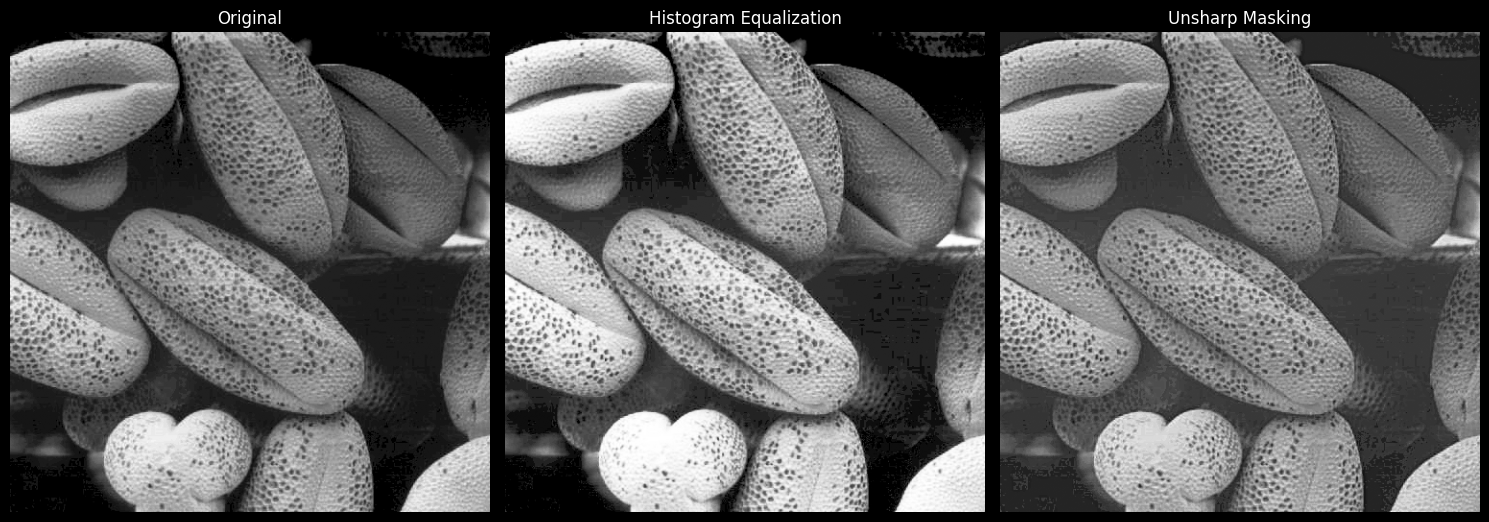

In [24]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(pollen_image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_img, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')

plt.tight_layout()
plt.show()

Statistical Comparison
First, I looked at the original image. Its average brightness (mean) is 109.08 and the contrast (standard deviation) is low at 11.49. This means the picture is not very bright and the colors are close to each other.

Then, I tried histogram equalization. After this, the average brightness went up to 122.68 and the contrast became much higher, 77.39. This shows that the image looks clearer and the colors are more different from each other. It helps the picture look more colorful and sharp.

Finally, I used unsharp masking. This method kept the average brightness almost the same as the original, 109.08, but made the contrast a little bit higher, 12.15. This means the edges and details are clearer, but the picture’s overall brightness did not change much.

In [25]:
print("\n--- Statistical Comparison ---")
print(f"Original      -> Mean: {mean_intensity:.2f}, Std Dev: {std_dev_intensity:.2f}")
print(f"Equalized     -> Mean: {equalized_stats[0]:.2f}, Std Dev: {equalized_stats[1]:.2f}")
print(f"Unsharp Mask  -> Mean: {unsharp_stats[0]:.2f}, Std Dev: {unsharp_stats[1]:.2f}")


--- Statistical Comparison ---
Original      -> Mean: 109.08, Std Dev: 11.49
Equalized     -> Mean: 122.68, Std Dev: 77.39
Unsharp Mask  -> Mean: 109.08, Std Dev: 12.15
